In [1]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

In [2]:
tc.__version__

'1.6.0'

In [3]:
batch_size = 256
num_inputs=28*28
num_classes=10

In [4]:
tcd2l.train_ch3??

Signature: tcd2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)
Source:   
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """Train a model (defined in Chapter 3)."""
    animator = Animator(xlabel='epoch', ylabel='metrics', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc
File:      c:\users\hp\miniconda3\envs\d2l\lib\site-packages\d2l\torch.py
Type:      function


## mxnet

In [103]:
batch_size = 256
train_iter, test_iter = mxd2l.load_data_fashion_mnist(batch_size)

In [104]:
from mxnet import gluon, init
from mxnet.gluon import nn

In [105]:
# nn.Dense??

In [106]:
net=nn.Sequential()
net.add(nn.Dense(num_classes))
net.initialize(init.Normal(sigma=0.01))

In [107]:
net

Sequential(
  (0): Dense(-1 -> 10, linear)
)

In [108]:
net.collect_params()

sequential11_ (
  Parameter dense11_weight (shape=(10, -1), dtype=float32)
  Parameter dense11_bias (shape=(10,), dtype=float32)
)

In [109]:
loss_1=gluon.loss.SoftmaxCELoss()
loss_2=gluon.loss.SoftmaxCrossEntropyLoss()

In [110]:
# gluon.loss.SoftmaxCELoss??

In [43]:
trainer=gluon.Trainer(net.collect_params(),'sgd',{"learning_rate":0.1})

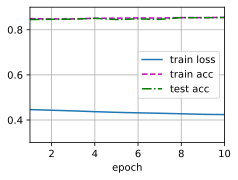

In [45]:
num_epochs = 10
mxd2l.train_ch3(net, train_iter, test_iter, loss_1, num_epochs, trainer)

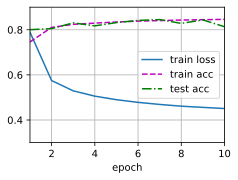

In [44]:
# net=nn.Sequential()
# net.add(nn.Dense(num_classes))
# net.initialize(init.Normal(sigma=0.01))
mxd2l.train_ch3(net, train_iter, test_iter, loss_2, num_epochs, trainer)

## torch

In [6]:
from torch import nn

In [7]:
batch_size = 256
train_iter, test_iter = tcd2l.load_data_fashion_mnist(batch_size)

In [8]:
X,y=next(iter(train_iter))

In [9]:
X[0].shape,X.shape

(torch.Size([1, 28, 28]), torch.Size([256, 1, 28, 28]))

In [10]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1,784)

In [11]:
net = nn.Sequential(Reshape(), nn.Linear(num_inputs, num_classes))

In [12]:
def init_weight(module):
    if type(module)==nn.Linear:
        tc.nn.init.normal_(module.weight,std=0.01)

In [13]:
net.apply(init_weight)

Sequential(
  (0): Reshape()
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [14]:
loss = nn.CrossEntropyLoss()

In [15]:
trainer = tc.optim.SGD(net.parameters(), lr=0.1)

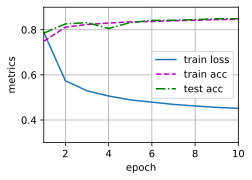

In [16]:
num_epochs = 10
tcd2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## tensorflow

In [4]:
batch_size = 256
train_iter, test_iter = tfd2l.load_data_fashion_mnist(batch_size)
K=tf.keras

In [5]:
net=tf.keras.models.Sequential()
net.add(K.layers.Flatten(input_shape=(28,28)))
weight_initializer=K.initializers.RandomNormal(mean=0.,stddev=0.01)
net.add(K.layers.Dense(10,kernel_initializer=weight_initializer))

In [6]:
# tf.print(net.summary())

In [7]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [8]:
loss=K.losses.SparseCategoricalCrossentropy(from_logits=True)

In [9]:
trainer=K.optimizers.SGD(learning_rate=0.1)

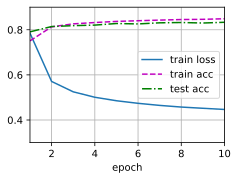

In [10]:
num_epochs = 10
tfd2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [11]:
!nvidia-smi

Tue Oct 27 16:25:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 451.67       Driver Version: 451.67       CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 207... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   56C    P0    28W /  N/A |   7499MiB /  8192MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                                  |
|  GPU  

## map、 lambda。 python3中已经没有apply内置函数了

In [67]:
m=map(lambda x: x*x, [y for y in range(10)] )

In [68]:
list(m)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [69]:
lm=lambda x:x*x

In [71]:
l=[y for y in range(10)]

In [72]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [82]:
lm(l)

TypeError: can't multiply sequence by non-int of type 'list'

In [17]:
l.apply(*lm)  # python3中已经没有apply内置函数了

NameError: name 'l' is not defined

In [75]:
list(map(lm,l))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [76]:
lm(l)

TypeError: can't multiply sequence by non-int of type 'list'

In [78]:
apply(lm,l)

NameError: name 'apply' is not defined

In [79]:
help(apply)

NameError: name 'apply' is not defined

In [84]:
functools.reduce??

Object `functools.reduce` not found.


In [85]:
filter??

Init signature: filter(self, /, *args, **kwargs)
Docstring:     
filter(function or None, iterable) --> filter object

Return an iterator yielding those items of iterable for which function(item)
is true. If function is None, return the items that are true.
Type:           type
Subclasses:     


In [87]:
list(filter(lm,l))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [88]:
list(map(lm,l))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [91]:
cm=lambda x:x<=3

In [92]:
list(filter(cm,l))

[0, 1, 2, 3]

In [93]:
[i<3 for i in l]

[True, True, True, False, False, False, False, False, False, False]